# a

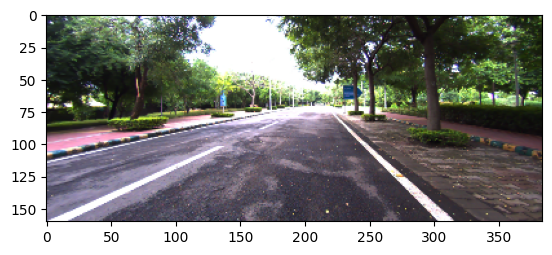

In [3]:
import numpy as np
import matplotlib.pyplot as plt
left = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/left.npy')
right = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/right.npy')

plt.imshow(left)
plt.savefig('left.jpg')

In [3]:
from PIL import Image

im = Image.fromarray(right)
# this might fail if `img_array` contains a data type that is not supported by PIL,
# in which case you could try casting it to a different dtype e.g.:
# im = Image.fromarray(img_array.astype(np.uint8))

im.show()

In [177]:
import torch
from torchsummary import summary
import sys
import numpy as np
sys.path.append('../../LearningByCheating')
from bird_view.models.image import ImagePolicyModelSS
import matplotlib.pyplot as plt
model = ImagePolicyModelSS('resnet34').to('cuda')
model.load_state_dict(torch.load('/home/moonlab/Documents/LearningByCheating/training/image_direct_unbiased_traffic_iitj/model-999.th'))
model.eval()
# rgb_left = np.load('rgb_left.npy')
# rgb_right = np.load('rgb_right.npy')
# model(torch.Tensor(np.transpose(rgb_left, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor(np.transpose(rgb_right, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor([25/3.6]).to('cuda'), torch.Tensor(np.array([[0, 0, 0, 1]])).to('cuda'), torch.Tensor(1).to('cuda'))
# summary(model, (torch.randn(1, 3, 160, 384).to('cuda'),torch.randn(1, 3, 160, 384).to('cuda'), torch.randn(1).to('cuda'), torch.randn(1, 4).to('cuda'), torch.randn(1).to('cuda')))


ImagePolicyModelSS(
  (conv_left): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

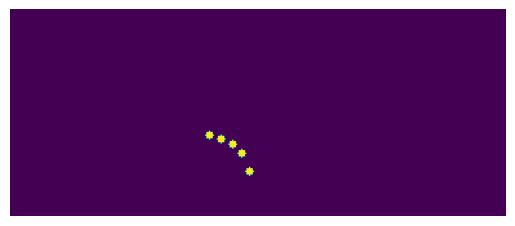

In [73]:
import cv2
from PIL import Image
# output = model(torch.Tensor(np.transpose(left, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor(np.transpose(right, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor([5]).to('cuda'), torch.Tensor(np.array([[1, 0, 0, 0]])).to('cuda'), torch.Tensor([0.0]).to('cuda'))
image = np.zeros((160, 384))
# output = output.squeeze().detach().cpu().numpy()
# output = (output + 1)*(np.array([384, 160]))/2
# print(output)
preds = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/preds.npy')
for x, y in preds[0]:
    image = cv2.circle(image, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)
from matplotlib import cm
# im = Image.fromarray(np.uint8(cm.jet(image)*255))
# # this might fail if `img_array` contains a data type that is not supported by PIL,
# # in which case you could try casting it to a different dtype e.g.:
# # im = Image.fromarray(img_array.astype(np.uint8))

# im.show()
fig = plt.figure(frameon=False)
plt.imshow(image)
plt.axis('off')
fig.savefig('left.png', bbox_inches='tight', pad_inches=0)

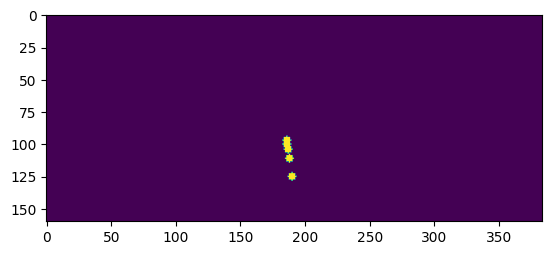

In [64]:
plt.imshow(image)

In [3]:
feature = x[0][0]
print(feature.shape)
weight = x[1]
print(weight.shape)
pos_x = x[2]
print(pos_x.shape)
pos_y = x[3]
print(pos_y.shape)
pos_x_weight = x[4]
print(pos_x_weight.shape)
pos_y_weight = x[5]
print(pos_y_weight.shape)
expected_xy = x[6]
print(expected_xy.shape)
feature_keypoints = x[7]
print(feature_keypoints.shape)

(5, 40, 96)
(5, 3840)
(3840,)
(3840,)
(5, 3840)
(5, 3840)
(5, 2)
(1, 5, 2)


In [4]:
def plot(feature):
    for i in range(5):
        # print(np.where(x[i] == 0.0, x[i]))
        plt.imshow(feature[i])
        plt.colorbar()
        # print(np.sum(feature[i], axis=0, keepdims=True))
        plt.show()

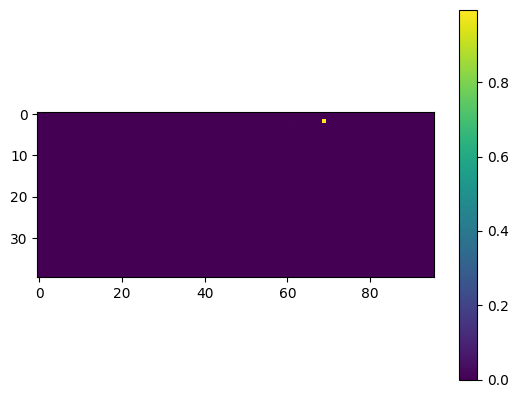

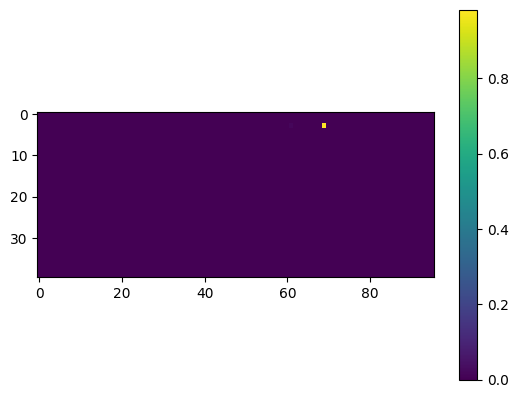

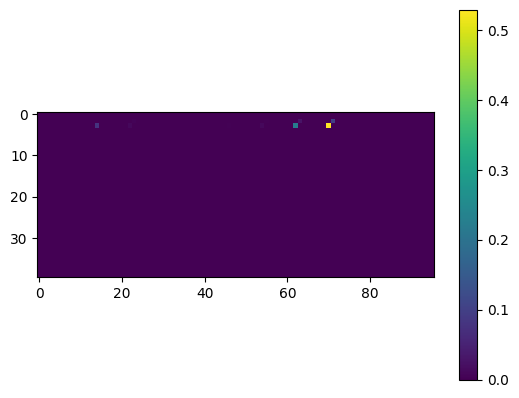

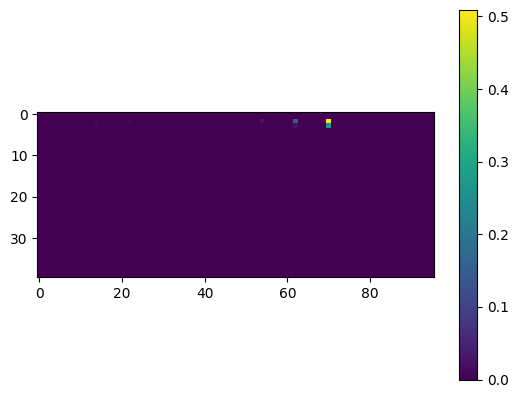

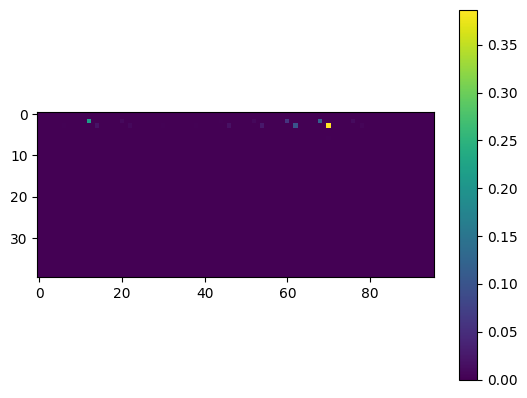

In [5]:
plot(weight.reshape(5, 40, 96))

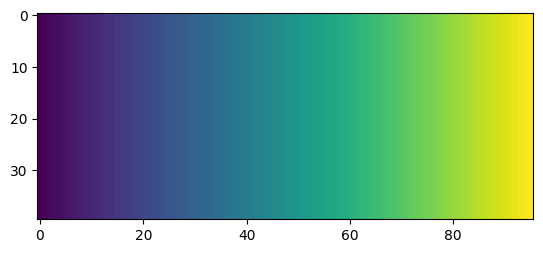

In [14]:
plt.imshow(pos_x.reshape(40, 96))

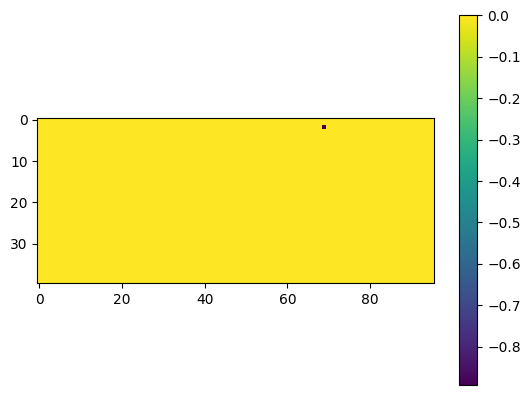

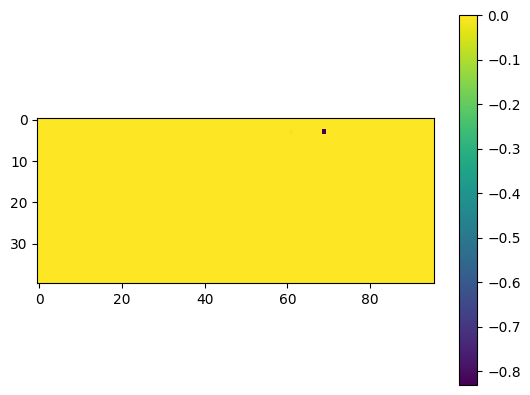

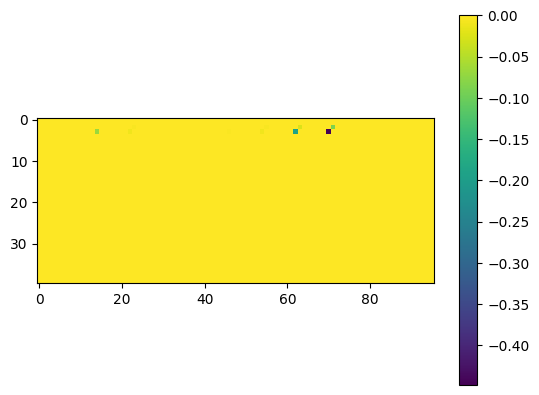

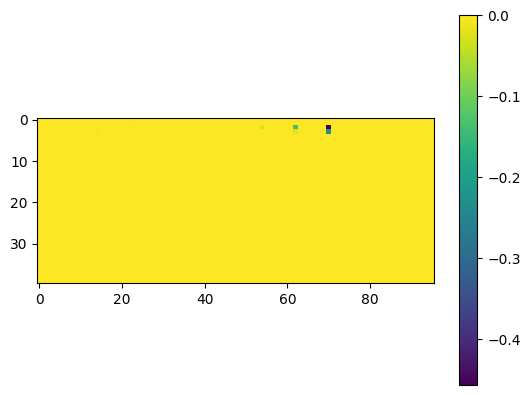

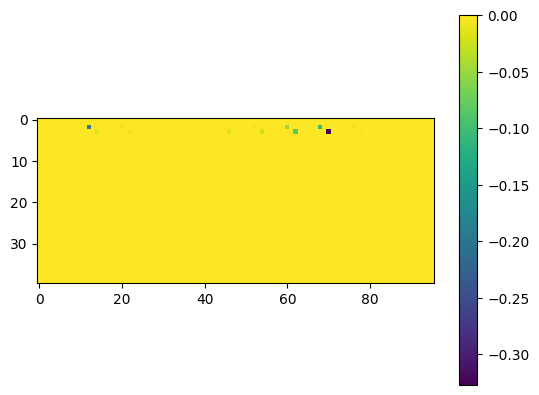

In [8]:
plot(pos_y_weight.reshape(5, 40, 96))

In [ ]:
for i in range(5):
    # print(np.where(x[i] == 0.0, x[i]))
    plt.imshow(x[i], cmap='gray')
    print(np.sum(x[i], axis=0, keepdims=True))
    plt.show()

In [13]:
print(expected_xy)
np.sum(expected_xy, axis=0)

[[ 0.45174897 -0.8974359 ]
 [ 0.44930932 -0.8461539 ]
 [ 0.3120067  -0.85311526]
 [ 0.41105688 -0.8821281 ]
 [ 0.1025184  -0.8668164 ]]


array([ 1.7266403, -4.3456497], dtype=float32)

In [16]:
np.sum(pos_x_weight, axis=1)

array([0.45174897, 0.44930932, 0.31200677, 0.41105685, 0.1025184 ],
      dtype=float32)

In [17]:
np.sum(pos_y_weight, axis=1)

array([-0.89743584, -0.8461539 , -0.85311526, -0.8821281 , -0.86681634],
      dtype=float32)

In [18]:
pos_x_weight.shape

(5, 3840)

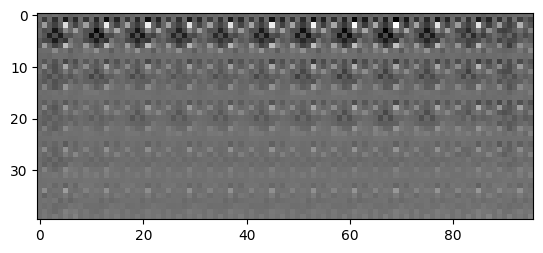

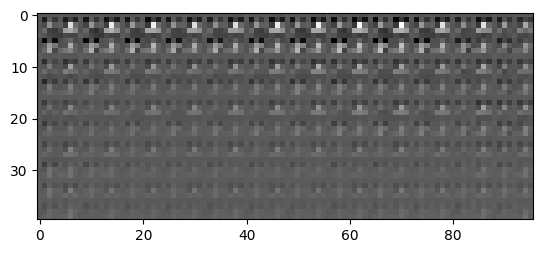

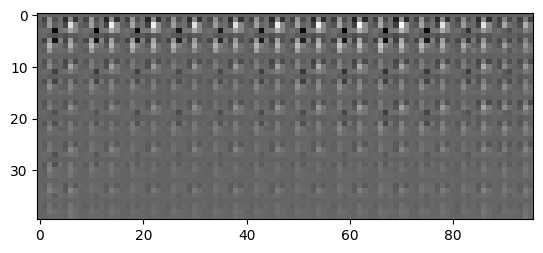

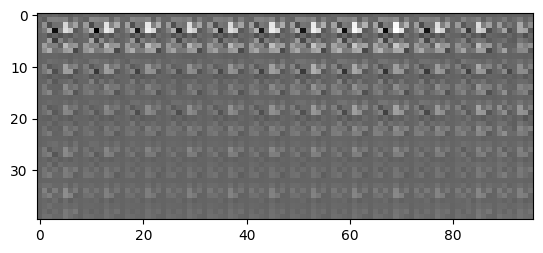

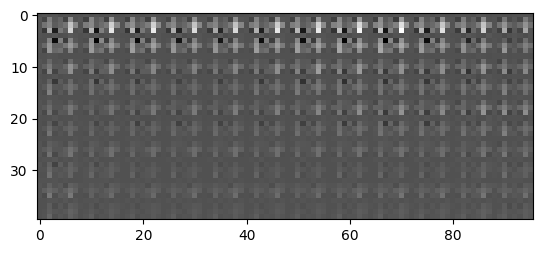

In [8]:
y = np.load('y.npy')
for i in range(5):
    plt.imshow(y[0][i], cmap='gray')
    plt.show()

# d


In [2]:
import numpy as np
import matplotlib.pyplot as plt

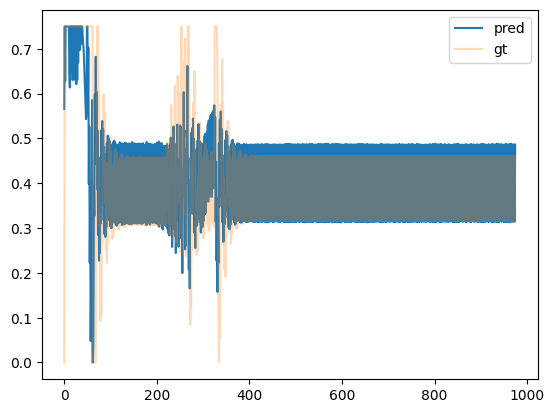

In [43]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[0])
plt.plot(tune[3], alpha=0.3)
plt.legend(['pred', 'gt'])

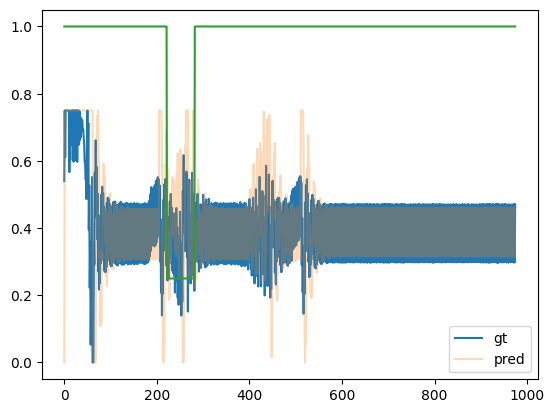

In [22]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[0])
plt.plot(tune[3], alpha=0.3)
plt.plot(tune[-1]/4)
plt.legend(['gt', 'pred'])

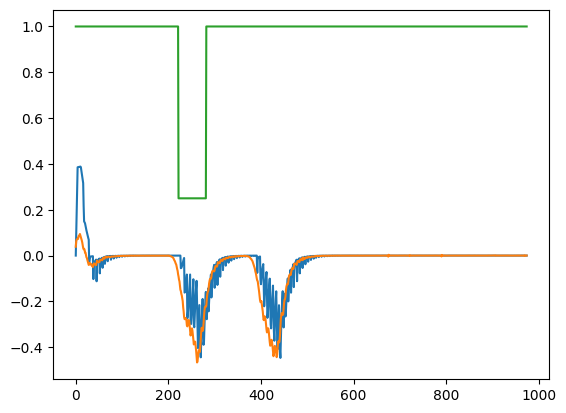

In [24]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[4])
plt.plot(tune[1])
plt.plot(tune[-1]/4)


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(tune[0], tune[3])

0.036957202282749874

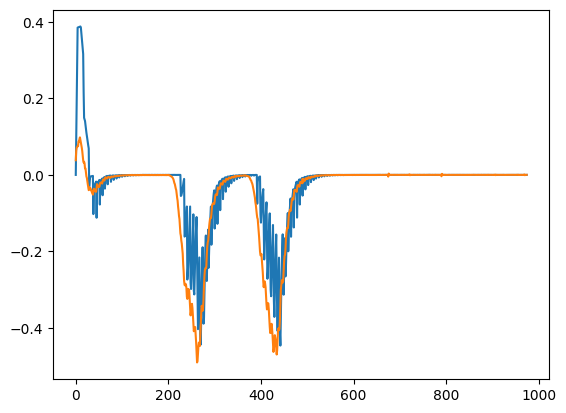

In [5]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[4])
plt.plot(tune[1])


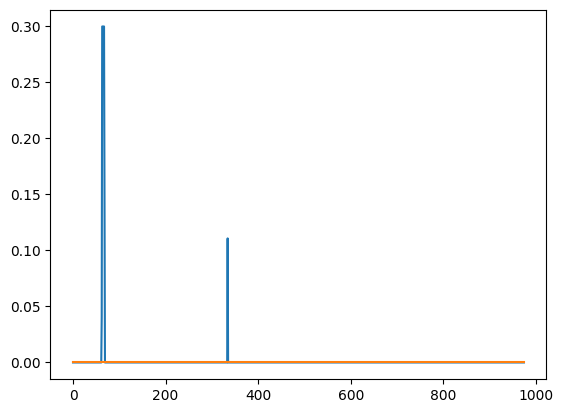

In [22]:
plt.plot(tune[5])
plt.plot(tune[2])

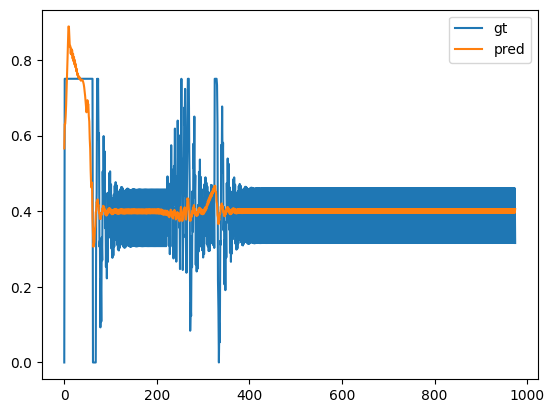

In [23]:
plt.plot(tune[3])
plt.plot(tune[0])
plt.legend(['gt', 'pred'])

In [2]:
import numpy as np
import lmdb
import cv2
import pygame
import torch
import sys
import glob
from data_util import YamlConfig, load_config
from pygame.locals import Color

try:
    sys.path.append(glob.glob('../PythonAPI')[0])
    sys.path.append(glob.glob('../bird_view')[0])
    sys.path.append(glob.glob('../drive')[0])
    sys.path.append('../LearningByCheating')
except IndexError as e:
    pass
from models.image import ImagePolicyModelSS
from utils.train_utils import one_hot
from torchvision import transforms
birdview_transform = transforms.ToTensor()
import pandas as pd
BLUE = Color('blue')
RED = Color('red')
ORANGE = Color('orange')
PIXELS_PER_METER = 5
N_STEP=5
CROP_SIZE = 320
MAP_SIZE=320
config = {'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
            'image_args' : {
                'model_path': '/home/moonlab/Documents/LearningByCheating/training/image_direct_unbiased_traffic_iitj/model-999.th',
                }
            }
image_net = ImagePolicyModelSS(backbone='resnet34').to(config['device'])
image_net.load_state_dict(torch.load(config['image_args']['model_path']))
image_net.eval()

pygame 2.1.2 (SDL 2.0.16, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


ImagePolicyModelSS(
  (conv_left): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

In [3]:

def unproject(output, world_y=0.88, fov=90):

    cx, cy = np.array([384, 160]) / 2
    
    w, h = np.array([384, 160])
    
    f = w /(2 * np.tan(fov * np.pi / 360))
    
    xt = (output[...,0:1] - cx) / f
    yt = (output[...,1:2] - cy) / f
    
    world_z = world_y / yt
    world_x = world_z * xt
    
    world_output = np.stack([world_x, world_z],axis=-1)
    
    world_output = world_output.squeeze()
    
    return world_output

In [6]:
pygame.init()
pygame.font.init()
args = YamlConfig.from_nested_dicts(load_config('config/hound_config.yaml'))

display = pygame.display.set_mode(
                    (args.width, args.height),
                    pygame.HWSURFACE | pygame.DOUBLEBUF)
WORLD_LOCATIONS = []
display.fill((0,0,0))
env = lmdb.open('/home/moonlab/Documents/LearningByCheating/dataset/train/001')
with env.begin() as txn:
    length = int(txn.get(str('len').encode()))
    for i in range(length-25):
        rgb_left = np.fromstring(txn.get(('rgb_left_%04d'%i).encode()), np.uint8).reshape(160,384,3)
        rgb_right = np.fromstring(txn.get(('rgb_right_%04d'%i).encode()), np.uint8).reshape(160,384,3)
        bird_view = np.fromstring(txn.get(('birdview_%04d'%i).encode()), np.uint8).reshape(320,320,8)
        # removing traffic channels
        measurement = np.frombuffer(txn.get(('measurements_%04d'%i).encode()), np.float32)
        display.blit(pygame.surfarray.make_surface(rgb_left.swapaxes(0, 1)), (0, 0))
        display.blit(pygame.surfarray.make_surface(rgb_right.swapaxes(0, 1)), (0, 160))
        display.blit(pygame.surfarray.make_surface(np.zeros((320, 320))), (704, 0))
        ox, oy, oz, ori_ox, ori_oy, vx, vy, vz, ax, ay, az, cmd, gt_steer, gt_throttle, gt_brake, manual, gear, traffic_light  = measurement

        rgb_left = birdview_transform(rgb_left)
        rgb_right = birdview_transform(rgb_right)
        rgb_left = rgb_left[None, :].to(config['device'])
        rgb_right = rgb_right[None, :].to(config['device'])
        traffic_light = torch.Tensor([traffic_light]).to(config['device'])
        command = one_hot(torch.Tensor([cmd])).to(config['device'])
        speed = np.sqrt(vx**2 + vy**2+vz**2)
        # print(float(speed)*18/5)
        speed = torch.Tensor([float(speed)]).to(config['device'])
        with torch.no_grad():
            _image_locations = image_net(rgb_left, rgb_right, speed, command, traffic_light)
        
        _image_locations = _image_locations.squeeze().detach().cpu().numpy()
        _world_locations = unproject((_image_locations + 1)*np.array([384, 160])/2)
        WORLD_LOCATIONS.append(_world_locations)
        pygame.display.update()
pygame.quit()

/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app
/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [8]:
WORLD_LOCATIONS = np.array(WORLD_LOCATIONS)
print(WORLD_LOCATIONS.shape)

(975, 5, 2)


In [ ]:
from models.controller import CustomController, PIDController
from models.controller import ls_circle
from models import common
from sklearn.metrics import mean_squared_error
steer_points = {"1": 4, "2": 4, "3": 2, "4": 4}
import itertools
import pandas as pd

hyper_params = {
    'S_KP': np.arange(0, 1, 0.1),
    'S_KI': np.arange(0, 1, 0.1),
    'S_KD': np.arange(0, 1, 0.1),
    'T_KP': np.arange(0, 1, 0.1),
    'T_KI': np.arange(0, 1, 0.1),
    'T_KD': np.arange(0, 1, 0.1),
}
df = pd.DataFrame(columns=['S_KP', 'S_KI', 'S_KD', 'T_KP', 'T_KI', 'T_KD', 'loss_T', 'loss_S'])


a = hyper_params.values()
combinations = list(itertools.product(*a))

for c in combinations:
    pred_t = []
    pred_s = []
    pred_b = []
    gt_t = []
    gt_b = []
    gt_s = []
    CMD = []
    pid = {
    "1" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Left
    "2" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Right
    "3" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Straight
    "4" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Follow
    }
    turn_control = CustomController(pid, dt=0.05)
    speed_control = PIDController(K_P=c[3], K_I=c[4], K_D=c[5], fps=20)
    for _world_locations in WORLD_LOCATIONS:
        targets = [(0, 0)]

        for i in range(5):
            pixel_dx, pixel_dy = _world_locations[i]
            angle = np.arctan2(pixel_dx, pixel_dy)
            dist = np.linalg.norm([pixel_dx, pixel_dy])

            targets.append([dist * np.cos(angle), dist * np.sin(angle)])

        targets = np.array(targets)
        target_speed = np.linalg.norm(targets[:-1] - targets[1:], axis=1).mean() / (5 * 0.05)

        center, r = ls_circle(targets)
        n = steer_points.get(str(int(cmd)), 1)
        closest = common.project_point_to_circle(targets[n], center, r)
        
        
        
        v = [1.0, 0.0, 0.0]
        w = [closest[0], closest[1], 0.0]
        alpha = common.signed_angle(v, w)
        acceleration = target_speed - speed
        steer = turn_control.run_step(alpha, int(cmd))
        throttle = speed_control.step(acceleration)
        brake = 0.0
        steer = np.clip(steer, -1.0, 1.0)
        throttle = np.clip(throttle.detach().cpu(), 0.0, 0.75)
        brake = np.clip(brake, 0.0, 1.0)
        pred_t.append(throttle)
        pred_s.append(steer)
        pred_b.append(brake)
        gt_t.append(gt_throttle)
        gt_s.append(gt_steer)
        gt_b.append(gt_brake)
        CMD.append(cmd)
    pred_t = np.array(pred_t)
    pred_s = np.array(pred_s)
    pred_b = np.array(pred_b)
    gt_t = np.array(gt_t)
    gt_s = np.array(gt_s)
    gt_b = np.array(gt_b)
    CMD = np.array(CMD)
    print(c)
    print(c[0], c[1], c[2], c[3],c[4], c[5], mean_squared_error(pred_t, gt_t), mean_squared_error(pred_s, gt_s))
    dict = {'S_KP': c[0], 'S_KI': c[1], 'S_KD': c[2], 'T_KP': c[3], 'T_KI': c[4], 'T_KD': c[5], 'loss_T':mean_squared_error(pred_t, gt_t), 'loss_S':mean_squared_error(pred_s, gt_s)}
    df = df.append(dict, ignore_index=True)
df.to_csv('tune.csv')

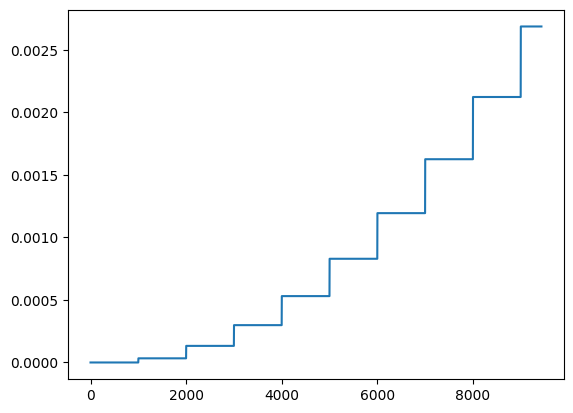

In [30]:
import matplotlib.pyplot as plt
# plt.plot(df['loss_T'])
plt.plot(df['loss_S'])

In [32]:
df.to_csv('tune.csv')

# d


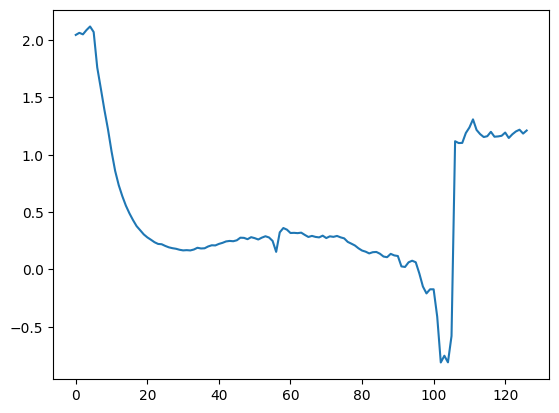

In [5]:
import matplotlib.pyplot as plt
import numpy as np

accel = np.load('acceleration.npy')
steer = np.load('steer.npy')

plt.plot(accel)

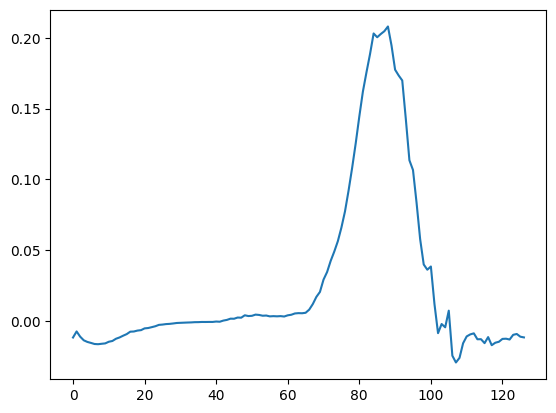

In [6]:
plt.plot(steer)

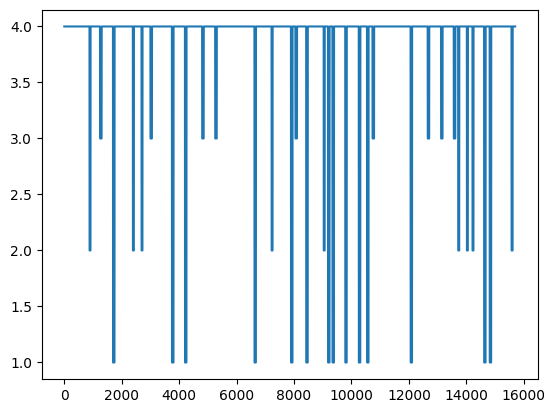

In [20]:
import numpy as np
import matplotlib.pyplot as plt
_cmd = np.load('run2/_cmd.npy')
plt.plot(_cmd)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
_cmd = np.load('run3/data.npy')
_cmd.shape
# plt.plot(_cmd[0])

(59, 11)

In [5]:
import carla
client = carla.Client('localhost', 2000)
world = client.get_world()
blueprint = world.get_blueprint_library().filter('vehicle.*')

In [6]:
for i in blueprint:
    if int(i.get_attribute('number_of_wheels')) == 2:
        print(i)

ActorBlueprint(id=vehicle.harley-davidson.low_rider,tags=[low_rider, harley-davidson, vehicle])
ActorBlueprint(id=vehicle.vespa.zx125,tags=[zx125, vespa, vehicle])
ActorBlueprint(id=vehicle.diamondback.century,tags=[century, diamondback, vehicle])
ActorBlueprint(id=vehicle.gazelle.omafiets,tags=[omafiets, gazelle, vehicle])
ActorBlueprint(id=vehicle.bh.crossbike,tags=[crossbike, bh, vehicle])
ActorBlueprint(id=vehicle.kawasaki.ninja,tags=[ninja, kawasaki, vehicle])
ActorBlueprint(id=vehicle.yamaha.yzf,tags=[yzf, yamaha, vehicle])


In [16]:
import carla
client = carla.Client('localhost', 2000)
world = client.get_world()
actors = world.get_actors()
for actor in  world.get_actors():
    print(actor)

In [14]:
world.get_actors()

In [23]:
import numpy as np
data = np.load('run4/data.npy')
np.degrees(data[-6][2745: 2760])

array([1.43575799, 2.04668159, 2.53216855, 3.20968851, 3.75183185,
       4.48695698, 4.83526547, 4.97760157, 5.19780402, 5.40189109,
       5.5594897 , 5.54937616, 5.00130874, 4.55143165, 3.73534812])

In [24]:
data[-3][2745: 2760]

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

# GPS

In [244]:
print(lat[0], lat[-1], lon[0], lon[-1])

23.2804608 23.284221 77.2757482 77.2747498


In [117]:
import folium
lat = gps[:, 1]
lon = gps[:, 0]
map_new=folium.Map(location= [lat[0], lon[0]] , zoom_start=14)
for i in range(len(lat)):
    folium.CircleMarker(
    location=[lat[i], lon[i]],
    radius=1,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(map_new)
#it will create file in your folder
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(map_new)
map_new.save('/home/moonlab/Desktop/India_tiger_reserve1.html')

In [15]:
from PIL import Image

def rotate_image(image_path, output_path):
    try:
        # Open the image
        img = Image.open(image_path)

        # Rotate the image 90 degrees counter-clockwise
        rotated_img = img.rotate(90, expand=True)

        # Save the rotated image
        rotated_img.save(output_path)
        print("Image rotated successfully.")
    except Exception as e:
        print(f"Error: {e}")


input_image_path = "/home/moonlab/Desktop/map_lines.png"
output_image_path = "/home/moonlab/Desktop/map_lines_rotate.png"
rotate_image(input_image_path, output_image_path)

Image rotated successfully.


In [13]:
import numpy as np
gps = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-31-27/gps.npy')
# import matplotlib.pyplot as plt
# plt.scatter(gps[:, 0][639:2430], gps[:, 1][639:2430])
# import pandas as pd

# df = {'Latitude': gps[:, 1][471:1091],
#       'Longitude': gps[:, 0][471:1091]}

# df = pd.DataFrame(df)
# df.to_csv('/home/moonlab/Desktop/run_2023-07-20-12-55-11-gps.csv')


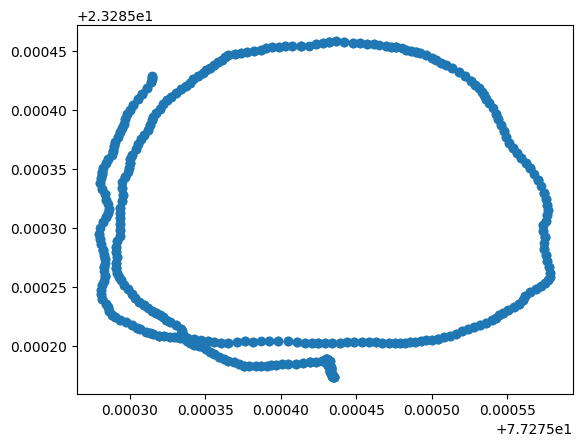

In [202]:
import numpy as np
gps = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/gps.npy')
import matplotlib.pyplot as plt
plt.scatter(gps[:, 0][470:], gps[:, 1][470:])

In [215]:
import pandas as pd

df = {'Latitude': gps[:, 1][471:1091]-0.0000168,
      'Longitude': gps[:, 0][471:1091]+0.00005}

df = pd.DataFrame(df)
df.to_csv('/home/moonlab/Desktop/gps.csv')

In [207]:
gps[:, 0][471+479]

77.2752949

In [148]:
import utm
import numpy as np
gps = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/gps.npy')
gps = gps[471:1091]
def convert_lat_lon_to_meters(lat_lon_array, initial_lat_lon):
    initial_utm_x, initial_utm_y, _, _ = utm.from_latlon(initial_lat_lon[0], initial_lat_lon[1])
    converted_coords = []

    for lat, lon in lat_lon_array:
        utm_x, utm_y, _, _ = utm.from_latlon(lat, lon)
        x_diff = utm_x - initial_utm_x
        y_diff = utm_y - initial_utm_y
        converted_coords.append([x_diff, y_diff])

    return np.array(converted_coords)

In [149]:
initial_location = gps[0]

In [150]:
converted_coords = convert_lat_lon_to_meters(gps, initial_location)

In [38]:
init = converted_coords[0]
dist = 0
print(init.shape)
for cord in converted_coords[1:]:
    dist += np.sqrt((cord[0]-init[0])**2 + (cord[1]-init[1])**2)
    init = cord
print(dist)

(2,)
83.54376378546407


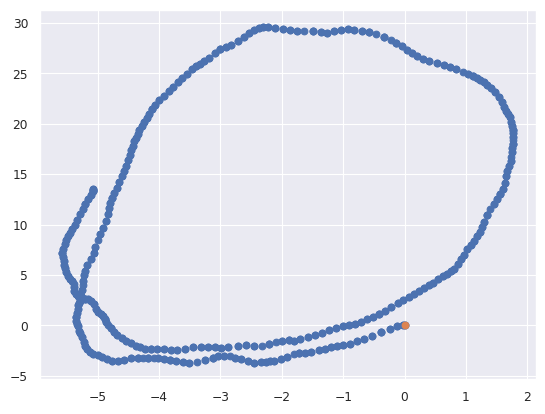

In [155]:
plt.scatter(converted_coords[:, 0], converted_coords[:, 1])
plt.scatter(converted_coords[0, 0], converted_coords[0, 1])
# plt.gca().set_aspect('equal')

In [102]:
plt.close()

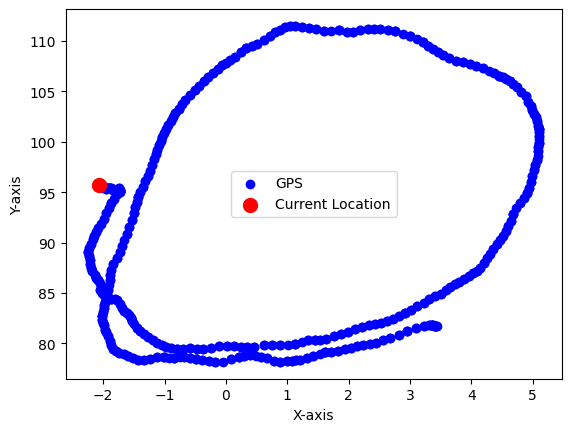

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update_scatter(frame):
    # Clear the previous plot
    plt.cla()

    # Plot all data points
    plt.scatter(x_data, y_data, color='b', label='GPS')

    # Highlight the current frame point
    plt.scatter(x_data[frame], y_data[frame], color='r', label='Current Location', s=100)

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()

    # Save each frame as an image
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/gps' + '/frame_{}.jpg'.format(frame))  # Change 'frame_{frame:03d}' as needed

# Example data (replace with your own data)
x_data = converted_coords[:, 0][460:]
y_data = converted_coords[:, 1][460:]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, update_scatter, frames=len(x_data), interval=4, repeat=False)

# Save the animation to a file (optional)
animation.save('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/gps.mp4', writer='ffmpeg')

# Show the animation (if you want to display it directly)
plt.show()


# vo

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('/home/moonlab/Documents/LearningByCheating/training/run-image_direct_unbiased_traffic_iitj-tag-Loss_train.csv')

(0.0, 0.002)

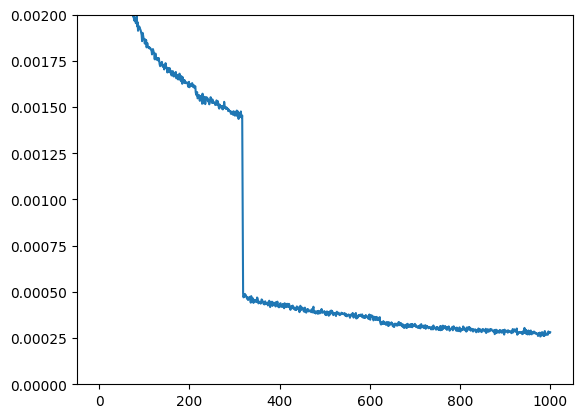

In [118]:
loss = df['Value']
step = df['Step']

plt.plot(step, loss)
plt.ylim(0, 0.002)

In [146]:
import numpy as np
data = np.load('/home/moonlab/Documents/LearningByCheating/drive/run6/data.npy')
print(data.shape)

(13, 50765)


In [132]:
print(max(data[2]))

26.0


In [157]:
lane = {1: 0, 2: 0, 3:0, 4:0}
lane_in = data[2][0]
for lane_invasion, command, distances, frames in zip(data[2], data[-3], data[1], data[0]):
    if distances < 10000:
        lane[command]+= lane_invasion - lane_in
        if lane_invasion - lane_in:
            print(frames)
        lane_in = lane_invasion
    else:
        print('done')


723.0
743.0
958.0
975.0
992.0
1003.0
2674.0
2685.0
3464.0
3483.0
4786.0
4798.0
11111.0
11123.0
11303.0
11313.0
12091.0
12111.0
12326.0
12343.0
12359.0
12370.0
30495.0
30508.0
30510.0
30527.0
30532.0
30551.0
30877.0
30890.0
30925.0
30938.0
31331.0
31347.0
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [158]:
lane

{1: 0.0, 2: 27.0, 3: 0.0, 4: 8.0}

In [133]:
print(data[2][0])

0.0


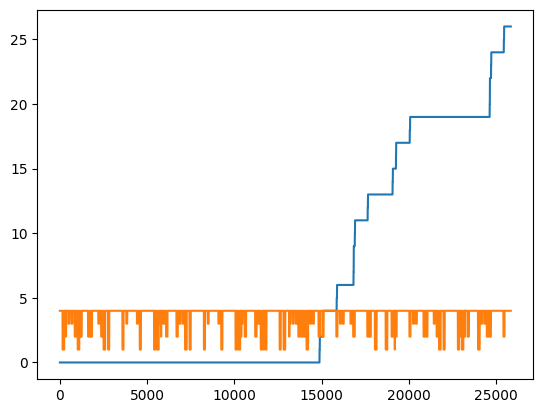

In [136]:
plt.plot(data[2])
plt.plot(data[-3])

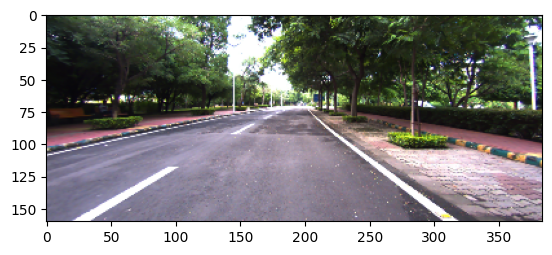

In [167]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(left)

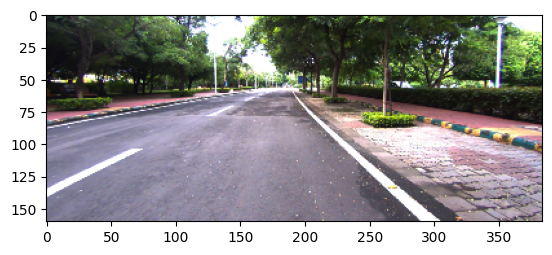

In [168]:
plt.imshow(right)

In [ ]:
import torch
from torchsummary import summary
import sys
import numpy as np
sys.path.append('../../LearningByCheating')
from bird_view.models.image import ImagePolicyModelSS
import matplotlib.pyplot as plt
model = ImagePolicyModelSS('resnet34').to('cuda')
model.load_state_dict(torch.load('/home/moonlab/Documents/LearningByCheating/training/image_direct_unbiased_traffic_iitj/model-999.th'))
model.eval()

In [181]:
preds = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/preds.npy')
left = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/left.npy')
right = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/right.npy')

for x, y in preds[-1]:
    left = cv2.circle(left, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)
    right = cv2.circle(right, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)

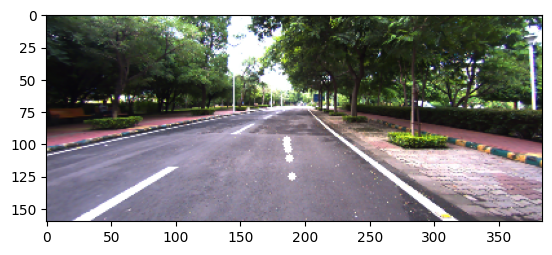

In [176]:
plt.imshow(left)

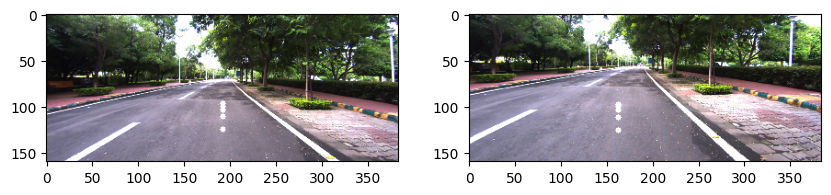

In [199]:
def unproject(output, world_y=0.88, fov=90):

    cx, cy = np.array([384, 160]) / 2
    
    w, h = np.array([384, 160])
    
    f = w /(2 * np.tan(fov * np.pi / 360))
    
    xt = (output[...,0:1] - cx) / f
    yt = (output[...,1:2] - cy) / f
    
    world_z = world_y / yt
    world_x = world_z * xt
    
    world_output = np.stack([world_x, world_z],axis=-1)
    
    world_output = world_output.squeeze()
    
    return world_output

class CoordConverter():
    def __init__(self, w=384, h=160, fov=90, world_y=0.88, fixed_offset=0.0, device='cuda', left=True):
        self._w = w
        self._h = h
        self.left = left
        self._img_size = torch.FloatTensor([w,h]).to(device)
        self._fov = fov
        self._world_y = world_y
        self._fixed_offset = fixed_offset
        
        self._tran = np.array([0.,0.,0.])
        self._rot  = np.array([0.,0.,0.])
        f = self._w /(2 * np.tan(self._fov * np.pi / 360))
        self._A = np.array([
            [f, 0., self._w/2],
            [0, f, self._h/2],
            [0., 0., 1.]
        ])
        
    def _project_image_xy(self, xy):
        N = len(xy)
        xyz = np.zeros((N,3))
        if self.left :
            self._tran = np.array([0.,0.0,0.])
        else: 
            self._tran = np.array([0.,-0.15,0.])
        xyz[:,1] = self._world_y
        xyz[:,2] = xy[:,1]
    
        image_xy, _ = cv2.projectPoints(xyz, self._tran, self._rot, self._A, None)
        image_xy[...,0] = np.clip(image_xy[...,0], 0, self._w)
        image_xy[...,1] = np.clip(image_xy[...,1], 0, self._h)
    
        return image_xy[:,0]
    
    def __call__(self, teacher_locations):
        # teacher_locations = map_locations.detach().cpu().numpy()
        # teacher_locations = (teacher_locations + 1) * CROP_SIZE / 2
        # N = teacher_locations.shape[0]
        # teacher_locations[:,:,1] = CROP_SIZE - teacher_locations[:,:,1]
        # teacher_locations[:,:,0] -= CROP_SIZE/2
        # teacher_locations = teacher_locations / PIXELS_PER_METER
        # teacher_locations[:,:,1] += self._fixed_offset
        teacher_locations = self._project_image_xy(np.reshape(teacher_locations, (5, 2)))
        teacher_locations = np.reshape(teacher_locations, (5,2))
        teacher_locations = torch.FloatTensor(teacher_locations)
    
        return teacher_locations

preds = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/preds.npy')
left = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/left.npy')
right = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/right.npy')
pred = unproject(preds[-1])
fig = plt.figure(figsize=(10, 5))

coord_converter_left = CoordConverter(left=True)
coord_converter_right = CoordConverter(left=False)
convert_left = coord_converter_left(pred)
convert_right = coord_converter_right(pred)
for x, y in convert_left:
    left = cv2.circle(left, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)

for x, y in convert_right:
    right = cv2.circle(right, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)
import matplotlib.pyplot as plt
import numpy as np

#plot 1:

plt.subplot(1, 2, 1)
plt.imshow(left)



plt.subplot(1, 2, 2)
plt.imshow(right)

plt.show()

In [39]:
import pandas as pd

train = pd.read_csv('/home/moonlab/Documents/LearningByCheating/training/run-image_direct_unbiased_traffic_iitj-tag-Loss_train.csv')
val = pd.read_csv('/home/moonlab/Documents/LearningByCheating/training/run-image_direct_unbiased_traffic_iitj-tag-Loss_val.csv')

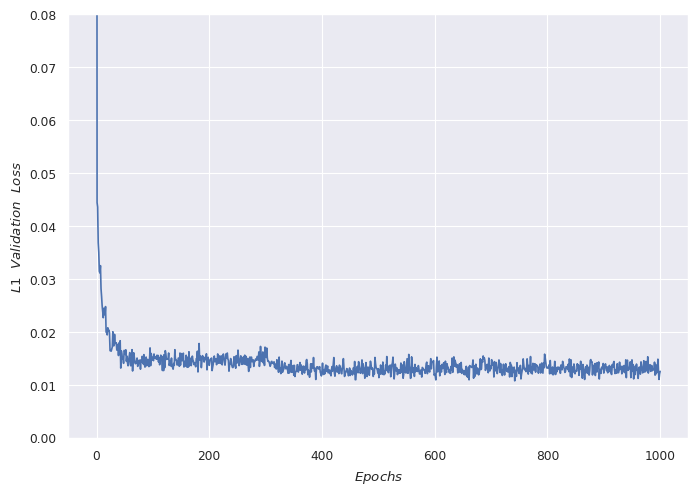

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("paper")

# Create the line plot using matplotlib and seaborn
plt.figure(figsize=(8, 5.5))
sns.lineplot(x=val['Step'], y=val['Value'])
plt.ylim((0, 0.08))

# Set the labels and title
plt.xlabel('$Epochs$')
plt.ylabel('$L1\ \ Validation\ \ Loss$')
plt.savefig('/home/moonlab/Desktop/val.png')


    # Display the plot
#     plt.show()
# plt.plot(train['Step'], train['Value'])
# plt.ylim((0, 0.008))
# plt.xlabel('$Epochs$')
# plt.ylabel('$L1\ \ Loss$')

Text(0, 0.5, '$PWM\\ Values$')

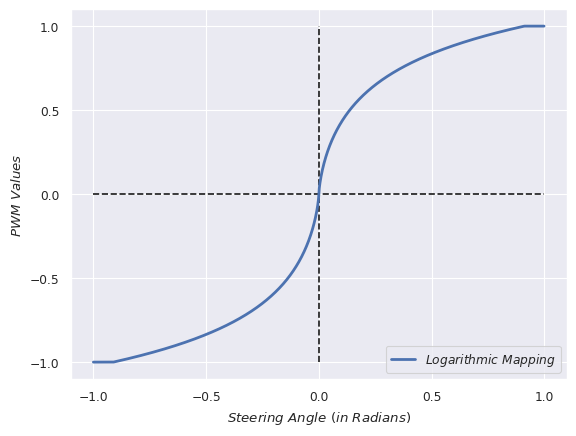

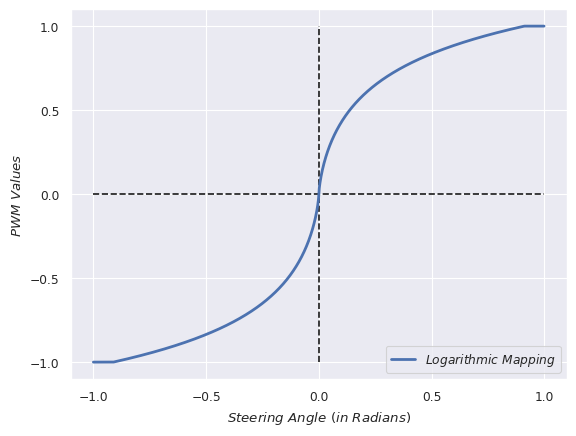

In [132]:


plt.savefig('/home/moonlab/Desktop/log.png')
# plt.legend(['$\frac{\abs{x}}{x}$'])
# plt.fill_between(np.arange(0, 1.1, 0.2), 1500, 1900, alpha=0.3, color='orange', label='Highlighted Area')
# plt.fill_between(np.arange(-1, 0.1, 0.2), 1100, 1500, alpha=0.3, color='green', label='Highlighted Area')

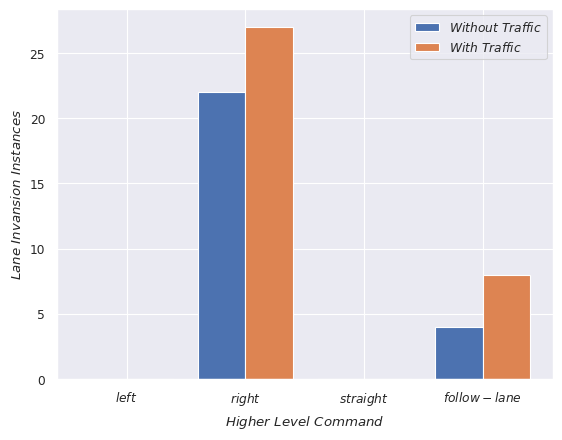

In [150]:
command = ['$left$', '$right$', '$straight$', '$follow-lane$']
X_axis = np.array([1, 2, 3, 4])
without_traffic = [0, 22, 0, 4]
with_traffic = [0, 27, 0, 8]

plt.bar(X_axis - 0.2, without_traffic, 0.4, label = '$Without\ Traffic$')
plt.bar(X_axis + 0.2, with_traffic, 0.4, label = '$With\ Traffic$')

plt.xticks(X_axis,command)
plt.xlabel('$Higher\ Level\ Command$')
plt.ylabel('$Lane\ Invansion\ Instances$')
plt.legend()
plt.savefig('/home/moonlab/Desktop/lane.png')

(160, 384, 3)
(3, 160, 384)


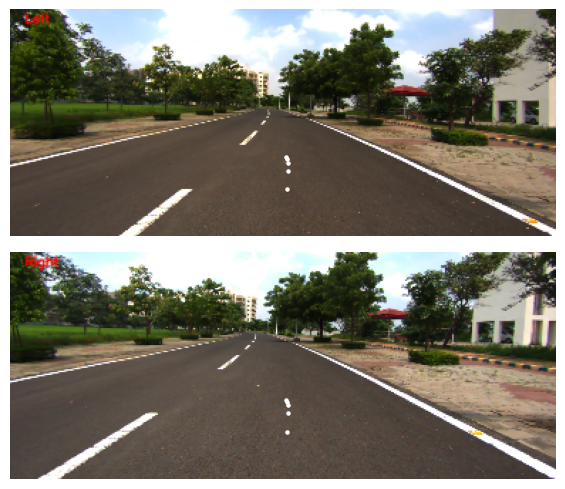

In [196]:
def unproject(output, world_y=0.88, fov=90):

    cx, cy = np.array([384, 160]) / 2
    
    w, h = np.array([384, 160])
    
    f = w /(2 * np.tan(fov * np.pi / 360))
    
    xt = (output[...,0:1] - cx) / f
    yt = (output[...,1:2] - cy) / f
    
    world_z = world_y / yt
    world_x = world_z * xt
    
    world_output = np.stack([world_x, world_z],axis=-1)
    
    world_output = world_output.squeeze()
    
    return world_output
import cv2
class CoordConverter():
    def __init__(self, w=384, h=160, fov=90, world_y=0.88, fixed_offset=0.0, device='cuda', left=True):
        self._w = w
        self._h = h
        self.left = left
        self._img_size = np.array([w,h])
        self._fov = fov
        self._world_y = world_y
        self._fixed_offset = fixed_offset
        
        self._tran = np.array([0.,0.,0.])
        self._rot  = np.array([0.,0.,0.])
        f = self._w /(2 * np.tan(self._fov * np.pi / 360))
        self._A = np.array([
            [f, 0., self._w/2],
            [0, f, self._h/2],
            [0., 0., 1.]
        ])
        
    def _project_image_xy(self, xy):
        N = len(xy)
        xyz = np.zeros((N,3))
        if self.left :
            self._tran = np.array([0.,0.0,0.])
        else: 
            self._tran = np.array([0.,-0.15,0.])
        xyz[:,1] = self._world_y
        xyz[:,2] = xy[:,1]
    
        image_xy, _ = cv2.projectPoints(xyz, self._tran, self._rot, self._A, None)
        image_xy[...,0] = np.clip(image_xy[...,0], 0, self._w)
        image_xy[...,1] = np.clip(image_xy[...,1], 0, self._h)
    
        return image_xy[:,0]
    
    def __call__(self, teacher_locations):
        # teacher_locations = map_locations.detach().cpu().numpy()
        # teacher_locations = (teacher_locations + 1) * CROP_SIZE / 2
        # N = teacher_locations.shape[0]
        # teacher_locations[:,:,1] = CROP_SIZE - teacher_locations[:,:,1]
        # teacher_locations[:,:,0] -= CROP_SIZE/2
        # teacher_locations = teacher_locations / PIXELS_PER_METER
        # teacher_locations[:,:,1] += self._fixed_offset
        teacher_locations = self._project_image_xy(np.reshape(teacher_locations, (5, 2)))
        teacher_locations = np.reshape(teacher_locations, (5,2))
        # teacher_locations = torch.FloatTensor(teacher_locations)
    
        return teacher_locations

preds = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/pred.npy')
left = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/cam0.npy')
right = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/LearningByCheating/catkin_ws/src/hound_lbc/scripts/cam1.npy')
pred = unproject(preds)
print(left.shape)
print(np.transpose(left, (2, 0, 1)).shape)
# output = model(torch.Tensor(np.transpose(left, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor(np.transpose(right, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor([6.94]).to('cuda'), torch.Tensor(np.array([[0, 0, 0, 1]])).to('cuda'), torch.Tensor([0.0]).to('cuda'))
# output = output.squeeze().detach().cpu().numpy()
# output = (output + 1)*(np.array([384, 160]))/2
fig = plt.figure(figsize=(10, 5))
coord_converter_left = CoordConverter(left=True)
coord_converter_right = CoordConverter(left=False)
convert_left = coord_converter_left(pred)
convert_right = coord_converter_right(pred)
# for x, y in convert_left:
#     left = cv2.circle(left, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)

# for x, y in convert_right:
#     right = cv2.circle(right, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)
import matplotlib.pyplot as plt
import numpy as np
#plot 1:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.subplot(2, 1, 1)
plt.imshow(left)
plt.scatter(preds[:, 0], preds[:, 1], c='w', s=5)
plt.axis('off')
plt.tight_layout()
# plt.savefig('/home/moonlab/Desktop/right_1.png')

plt.subplot(2, 1, 2)
plt.imshow(right)
plt.scatter(preds[:, 0], preds[:, 1], c='w', s=5)
plt.axis('off')
plt.tight_layout()
plt.savefig('/home/moonlab/Desktop/result_3.png')
plt.show()

In [179]:
output

array([[171.67691803,   8.20513248],
       [ 91.22848892,   8.20513248],
       [ 95.46250534,   8.20512295],
       [114.52832794,  12.17310905],
       [110.02482605,  12.30770111]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("paper")
import math
steer = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/steer.npy')
steer = steer[471: 1091]
def ff(value):
    old_min = 0
    old_max = 0.3
    
    new_min = 1100
    new_max = 1900

    # Perform the linear mapping
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_value = (((value - old_min) * new_range) / old_range) + new_min
    new_value = np.clip(new_value, 1100, 1900)
        # Return the converted value
    return int(new_value)
def f(x):
    sign = np.sign(x)
    absolute_value = np.abs(x)
    out = sign * np.power(math.log(1 + (4*math.e - 1)*absolute_value, 10), 0.7)
    out = 1500 + out * 400
    # if sign == -1:
    #     out = 1500 - out * (1500 - 1100)
    # else:
    #     out = 1500 + out * (1900 - 1500)
    
    
    return np.clip(out, 1100, 1900)

x = np.arange(-1, 1, 0.001)
y = []
for i in x:
    y.append(f(i))
print(steer[0])
for i in range(len(steer)):
    plt.figure(figsize=(8, 5.5))
    plt.tight_layout()
    # plt.subplot(2,1, 1)
    plt.xticks(np.arange(-1, 1.1, 0.5))
    plt.yticks(np.arange(1100, 1901, 200))
    plt.vlines(x = 0, colors='k', linestyle='--', ymin=1100, ymax=1900)
    plt.hlines(y = 1500, colors='k', linestyle='--', xmin=-1.0, xmax=1.0)
    plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
    plt.vlines(x = steer[i], colors='r', linestyle='--', ymin=1500, ymax=f(steer[i]))
    plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
    # plt.hlines(y = 1100, colors='r', linestyle='--', xmin=-1.0, xmax=1.0)
    plt.legend(loc='lower right')
    plt.xlabel('$Steering\ Angle\ (in\ Radians)$')
    plt.ylabel('$PWM\ Values$')
    plt.scatter(steer[i], f(steer[i]), c='r', s=50)
    plt.text(-0.9, 1800, '$PWM : % 15.0f$' % f(steer[i]))
    plt.text(-0.9, 1760, '$Radians : % 15.3f$' % steer[i])
    # plt.text(0.)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/steer' + '/frame _{}.jpeg'.format(i+1))
    plt.close()
# plt.subplot(2, 1, 2)
# sns.lineplot(x=val['Step'], y=val['Value'])
# plt.ylim((0, 0.08))

0.038794856518507004


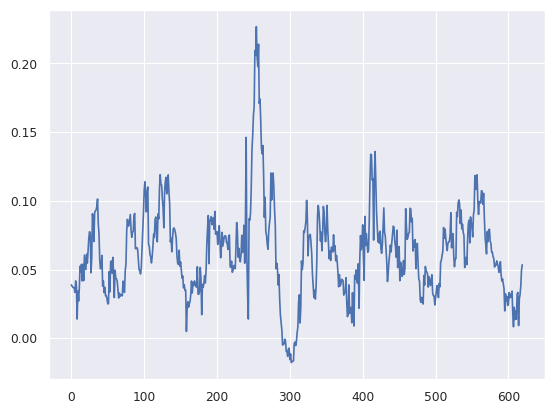

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("paper")
import math
steer = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/steer.npy')
steer = steer[471: 1091]
plt.plot(steer)

In [194]:


def f(x):
    sign = np.sign(x)
    absolute_value = np.abs(x)
    out = sign * np.power(math.log(1 + (4*math.e - 1)*absolute_value, 10), 0.7)
    out = 1500 + out * 400
    # if sign == -1:
    #     out = 1500 - out * (1500 - 1100)
    # else:
    #     out = 1500 + out * (1900 - 1500)
    
    
    return np.clip(out, 1100, 1900)
def ff(value):
    old_min = 0
    old_max = 0.3
    
    new_min = 1100
    new_max = 1900

    # Perform the linear mapping
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_value = (((value - old_min) * new_range) / old_range) + new_min
    new_value = np.clip(new_value, 1100, 1900)
        # Return the converted value
    return int(new_value)
x = np.arange(-1, 1, 0.001)
y = []
for i in x:
    y.append(f(i))
print(steer[0])
for i in range(1):
    plt.figure(figsize=(8, 4))
    plt.tight_layout()
    # plt.subplot(2,1, 1)
    # plt.xticks(np.arange(-1, 1.1, 0.5))
    plt.xticks(np.arange(1100, 1901, 200))
    plt.ylim(-0.05, 0.10)
    plt.yticks([])
    plt.hlines(y = 0, colors='k', linestyle='-', xmin=1100, xmax=1900)
    plt.hlines(y = 0.05, colors='k', linestyle='-', xmin=1100, xmax=1900)
    # plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
    # plt.vlines(x = 1500, colors='k', linestyle='--', ymin=-0.04, ymax=0.04)
    # plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
    # plt.hlines(y = 1100, colors='r', linestyle='--', xmin=-1.0, xmax=1.0)
    # plt.legend(loc='lower right')
    # plt.xlabel('$Steering\ Angle\ (in\ Radians)$')
    plt.xlabel('$PWM\ Values$')
    plt.scatter(f(steer[i]), 0, c='r', s=100)
    plt.scatter(ff(throttle[i]), 0.05, c='r', s=100)
    plt.text(1150, 0.01, '$Steering PWM : % 15.0f$' % f(steer[i]), fontstyle='oblique', fontsize='xx-large')
    plt.text(1150, 0.06, '$Throttle PWM : % 15.0f$' % ff(throttle[i]), fontstyle='oblique', fontsize='xx-large')
    plt.annotate(text='', xy=(1900, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='b'))
    plt.annotate(text='', xy=(1100, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='g'))
    plt.text(1250, -0.04, '$left\ turn$', fontstyle='oblique', color='g', fontsize='x-large')
    plt.text(1650, -0.04, '$right\ turn$', fontstyle='oblique', color='b', fontsize='x-large')
    # plt.text(0.)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-55-11/throttle' + '/frame _{}.jpeg'.format(i+1))
    plt.close()

0.016060754656791687


In [201]:
def f(x):
    sign = np.sign(x)
    absolute_value = np.abs(x)
    out = sign * np.power(math.log(1 + (4*math.e - 1)*absolute_value, 10), 0.7)
    out = 1500 + out * 400
    # if sign == -1:
    #     out = 1500 - out * (1500 - 1100)
    # else:
    #     out = 1500 + out * (1900 - 1500)
    
    
    return np.clip(out, 1100, 1900)

x = np.arange(-1, 1, 0.001)
y = []
for i in x:
    y.append(f(i))

steer = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer.npy')

steer = steer[1351:1608]
for i in range(len(steer)):
    plt.figure(figsize=(8, 4))
    plt.tight_layout()
    # plt.subplot(2,1, 1)
    # plt.xticks(np.arange(-1, 1.1, 0.5))
    plt.xticks(np.arange(1100, 1901, 200))
    plt.ylim(-0.05, 0.10)
    plt.yticks([])
    plt.hlines(y = 0, colors='k', linestyle='-', xmin=1100, xmax=1900)
    plt.hlines(y = 0.05, colors='k', linestyle='-', xmin=1100, xmax=1900)
    # plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
    # plt.vlines(x = 1500, colors='k', linestyle='--', ymin=-0.04, ymax=0.04)
    # plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
    # plt.hlines(y = 1100, colors='r', linestyle='--', xmin=-1.0, xmax=1.0)
    # plt.legend(loc='lower right')
    # plt.xlabel('$Steering\ Angle\ (in\ Radians)$')
    plt.xlabel('$PWM\ Values$')
    plt.scatter(f(steer[i]), 0, c='r', s=100)
    plt.scatter(ff(throttle[i]), 0.05, c='r', s=100)
    # plt.text(1150, 0.01, '$Steering PWM : % 15.0f$' % f(steer[i]), fontstyle='oblique', fontsize='xx-large')
    # plt.text(1150, 0.06, '$Throttle PWM : % 15.0f$' % ff(throttle[i]), fontstyle='oblique', fontsize='xx-large')
    plt.annotate(text='', xy=(1900, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='b'))
    plt.annotate(text='', xy=(1100, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='g'))
    plt.text(1250, -0.04, '$left\ turn$', fontstyle='oblique', color='g', fontsize='x-large')
    plt.text(1650, -0.04, '$right\ turn$', fontstyle='oblique', color='b', fontsize='x-large')
    # plt.text(0.)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer' + '/frame _{}.jpeg'.format(i+1))
    plt.close()

In [198]:

def f(value):
    old_min = 0
    old_max = 0.3
    
    new_min = 1100
    new_max = 1900

    # Perform the linear mapping
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_value = (((value - old_min) * new_range) / old_range) + new_min
    new_value = np.clip(new_value, 1100, 1900)
        # Return the converted value
    return int(new_value)
throttle = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/throttle.npy')

throttle = throttle[1351:1608]
for i in range(len(throttle)):
    print(throttle[i])
    plt.figure(figsize=(8, 3))
    plt.tight_layout()
    # plt.subplot(2,1, 1)
    # plt.xticks(np.arange(-1, 1.1, 0.5))
    plt.xticks(np.arange(1100, 1901, 200))
    plt.yticks([])
    plt.hlines(y = 0, colors='k', linestyle='-', xmin=1100, xmax=1900)
    plt.hlines(y = 0, colors='k', linestyle='-', xmin=1100, xmax=1900)
    # plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
    # plt.vlines(x = 1500, colors='k', linestyle='--', ymin=-0.04, ymax=0.04)
    # plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
    # plt.hlines(y = 1100, colors='r', linestyle='--', xmin=-1.0, xmax=1.0)
    # plt.legend(loc='lower right')
    # plt.xlabel('$Steering\ Angle\ (in\ Radians)$')
    # plt.xlabel('$Throttle\ PWM\ Values$')
    plt.scatter(f(throttle[i]), 0, c='r', s=100)
    plt.text(1150, 0.03, '$PWM : % 15.0f$' % f(throttle[i]), fontstyle='oblique', fontsize='xx-large')
    # plt.annotate(text='', xy=(1900, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='b'))
    # plt.annotate(text='', xy=(1100, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='g'))
    # plt.text(1250, -0.04, '$left\ turn$', fontstyle='oblique', color='g', fontsize='x-large')
    # plt.text(1650, -0.04, '$right\ turn$', fontstyle='oblique', color='b', fontsize='x-large')
    # plt.text(0.)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/throttle' + '/frame _{}.jpeg'.format(i+1))
    plt.close()

0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896
0.30000001192092896


In [164]:
steer = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer.npy')
throttle = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/throttle.npy')



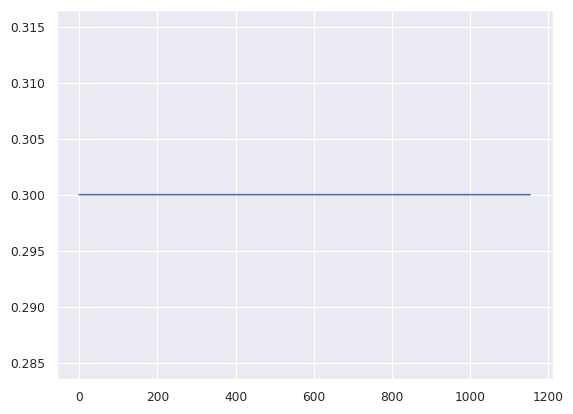

In [24]:
plt.plot(throttle)

In [251]:
preds = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/preds.npy')
for i in range(1351, 1608):
    image = plt.imread('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/cam1/frame_{}.jpeg'.format(i))
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.scatter(preds[i][:, 0], preds[i][:, 1], marker='o', c='r', s=20, edgecolors='white')
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/cam1_new/frame_{}.jpeg'.format(i), bbox_inches='tight')
    plt.close()
    # plt.savefig()

In [21]:
preds[0][:, 0]

array([193.03477478, 193.83988953, 194.68144226, 195.00569916,
       195.34867859])

In [183]:
gps = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/gps.npy')
gps = gps[1351:1608] - gps[1351]
route1 = plt.imread('/home/moonlab/Desktop/route1.png')
# plt.scatter(gps[:, 0], gps[:, 1])

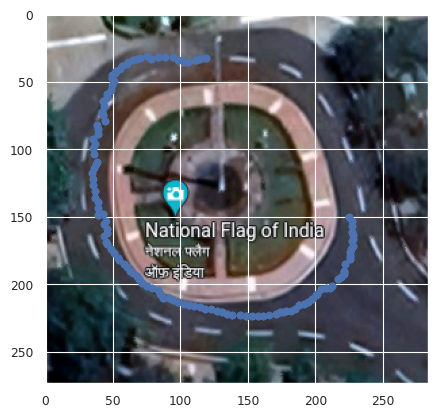

In [189]:
plt.imshow(route1)
plt.scatter(gps[:, 0]*800000+225, -gps[:, 1]*800000+150)

plt.gca().set_aspect('equal')


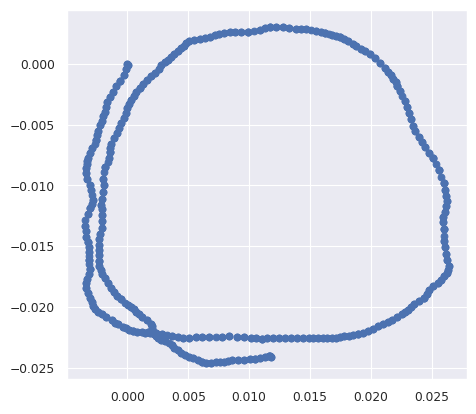

In [161]:
plt.scatter(gps[:, 0]*100, gps[:, 1]*100)
plt.gca().set_aspect('equal')

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from PIL import Image

def plot_gps_coordinates(gps_coordinates, map_type='natural_earth', save_path='map_with_gps.png'):
    """
    Plots GPS coordinates over a map using cartopy and saves the image.
    
    Parameters:
        gps_coordinates (list of tuples): List of (longitude, latitude) tuples representing GPS coordinates.
        map_type (str): The type of map to use. Default is 'natural_earth'.
        save_path (str): The file path to save the resulting image. Default is 'map_with_gps.png'.
    """
    # Create a figure and axis using cartopy
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the map type
    ax.set_global()
    ax.stock_img()
    
    # Plot the GPS coordinates
    for lon, lat in gps_coordinates:
        ax.plot(lon, lat, 'ro', markersize=8, transform=ccrs.Geodetic())
    
    # Save the plot as an image
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Map with GPS coordinates saved as '{save_path}'.")

# Example usage:
if __name__ == "__main__":
    gps_coordinates = gps  # Replace with your GPS coordinates
    plot_gps_coordinates(gps_coordinates, map_type='natural_earth', save_path='map_with_gps.png')


ModuleNotFoundError: No module named 'cartopy'

Text(1650, -0.04, '$right\\ turn$')

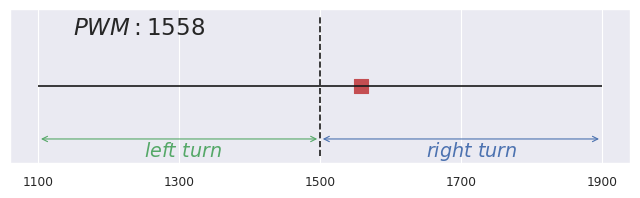

In [193]:
plt.figure(figsize=(8, 2))
plt.tight_layout()
# plt.subplot(2,1, 1)
# plt.xticks(np.arange(-1, 1.1, 0.5))
plt.xticks(np.arange(1100, 1901, 200))
plt.yticks([])
plt.hlines(y = 0, colors='k', linestyle='-', xmin=1100, xmax=1900)
# plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
plt.vlines(x = 1500, colors='k', linestyle='--', ymin=-0.04, ymax=0.04)
# plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
# plt.hlines(y = 1100, colors='r', linestyle='--', xmin=-1.0, xmax=1.0)
# plt.legend(loc='lower right')
# plt.xlabel('$Steering\ Angle\ (in\ Radians)$')
# plt.xlabel('$Steering\ PWM\ Values$')
plt.scatter(f(steer[0]), 0, c='r', s=100, marker='s')
plt.text(1150, 0.03, '$PWM : % 15.0f$' % f(steer[0]), fontstyle='oblique', fontsize='xx-large')
plt.annotate(text='', xy=(1900, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='b'))
plt.annotate(text='', xy=(1100, -0.03), xytext=(1500,-0.03), arrowprops=dict(arrowstyle='<->', color='g'))
plt.text(1250, -0.04, '$left\ turn$', fontstyle='oblique', color='g', fontsize='x-large')
plt.text(1650, -0.04, '$right\ turn$', fontstyle='oblique', color='b', fontsize='x-large')
# plt.text(-0.9, 1760, '$Radians : % 15.3f$' % steer[i])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_theme()
sns.set_context("paper")
steer = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer.npy')
def f(x):
    sign = np.sign(x)
    absolute_value = np.abs(x)
    out = sign * np.power(math.log(1 + (4*math.e - 1)*absolute_value, 10), 0.7)
    out = 1500 + out * 400
    # if sign == -1:
    #     out = 1500 - out * (1500 - 1100)
    # else:
    #     out = 1500 + out * (1900 - 1500)
    
    
    return np.clip(out, 1100, 1900)
steer = steer[1351:1608]
y = []
for i in range(len(steer)):
    y.append(f(steer[i]))
x = np.arange(1, len(steer))
# i=10
# plt.plot(y)
# plt.plot(x[0:i], y[0:i])
# plt.ylim(1100, 1901)
# plt.xlim(1, 21)
i = 21

# fig = plt.figure(figsize=(8, 3))
# if i < 15:
#     plt.plot(x[0:i], y[0:i])
#     plt.ylim(1100, 1901)
#     plt.xlim(1, 21)
#     plt.xticks(np.arange(1, 21, 4))
#     plt.yticks(np.arange(1100, 1901, 200))
#     plt.scatter(i, y[i-1], c='r', s=50, marker='o', edgecolors='black')
#     plt.hlines(y = 1500, colors='k', linestyle='--', xmin=i-14, xmax=i+6)

# else:
#     plt.plot(x[i-15:i], y[i-15:i])
#     plt.ylim(1100, 1901)
#     plt.xlim(i-14, i+6)
#     plt.xticks(np.arange(i-14, i+6, 4))
#     plt.yticks(np.arange(1100, 1901, 200))
#     plt.scatter(i, y[i-1], c='r', s=50, marker='o', edgecolors='black')
#     plt.hlines(y = 1500, colors='k', linestyle='--', xmin=i-14, xmax=i+6)
width=10
for i in range(0, len(steer)):
    fig = plt.figure(figsize=(8, 3))
    if i < width:
        plt.plot(x[0:i], y[0:i])
        plt.ylim(1100, 1901)
        plt.xlim(1, width+1)
        plt.xticks(np.arange(1, width+1, 4))
        plt.yticks(np.arange(1100, 1901, 200))
        plt.scatter(i, y[i-1], c='r', s=50, marker='o', edgecolors='black')
        plt.hlines(y = 1500, colors='k', linestyle='--', xmin=1, xmax=width+1)

    else:
        plt.plot(x[i-width:i], y[i-width:i])
        plt.ylim(1100, 1901)
        plt.xlim(i-14, i+6)
        plt.xticks(np.arange(i-width-6, i+6, 4))
        plt.yticks(np.arange(1100, 1901, 200))
        plt.scatter(i, y[i-1], c='r', s=50, marker='o', edgecolors='black')
        plt.hlines(y = 1500, colors='k', linestyle='--', xmin=i-width+6, xmax=i+6)
    print(i)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer/frame_{}.jpeg'.format(i))
    plt.close()

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import math
steer = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer.npy')
steer = steer[1351:1608]
throttle = np.load('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/throttle.npy')
throttle = throttle[1351:1608]
def f(x):
    sign = np.sign(x)
    absolute_value = np.abs(x)
    out = sign * np.power(math.log(1 + (4*math.e - 1)*absolute_value, 10), 0.7)

    # if sign == -1:
    #     out = 1500 - out * (1500 - 1100)
    # else:
    #     out = 1500 + out * (1900 - 1500)
    
    out = 1500 + out*400
    return np.clip(out, 1100, 1900)

x = np.arange(-1, 1, 0.001)
y = []
for i in x:
    y.append(f(i))

def ff(value):
    old_min = 0
    old_max = 0.3
    
    new_min = 1100
    new_max = 1900

    # Perform the linear mapping
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_value = (((value - old_min) * new_range) / old_range) + new_min
    new_value = np.clip(new_value, 1100, 1900)
        # Return the converted value
    return int(new_value)
for i in range(len(steer)):
    plt.xticks(np.arange(-1, 1.1, 0.5))
    # plt.yticks(np.arange(1100, 1901, 200))
    plt.vlines(x = 0, colors='k', linestyle='--', ymin=1100, ymax=1900)
    plt.hlines(y = 1500, colors='k', linestyle='--', xmin=-1.0, xmax=1.0)

    plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
    plt.scatter(steer[i], f(steer[i]), s=50, marker='o', c='r', edgecolors='black')
    plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
    plt.vlines(x = steer[i], colors='r', linestyle='--', ymin=1500, ymax=f(steer[i]))
    plt.text(-1.1, 1500+50, '$-1.0$', fontsize='x-large')
    plt.text(-0.6, 1500+50, '$-0.5$', fontsize='x-large')
    plt.text(-0.1, 1500+50, '$0.0$', fontsize='x-large')
    plt.text(0.45, 1500+50, '$0.5$', fontsize='x-large')
    plt.text(0.95, 1500+50, '$1.5$', fontsize='x-large')
    plt.scatter([-1, -0.5, 0, 0.5, 1], [1500, 1500, 1500, 1500, 1500], s=50, marker='|', c='k', edgecolors='black')
    plt.text(0.05, 1900-15, '$1900$', fontsize='x-large')
    plt.text(0.05, 1700-15, '$1700$', fontsize='x-large')

    plt.text(0.05, 1300-15, '$1300$', fontsize='x-large')
    plt.text(0.05, 1100-15, '$1100$', fontsize='x-large')
    plt.scatter([0, 0, 0, 0, 0], [1900, 1700, 1500, 1300, 1100], s=50, marker='_', c='k', edgecolors='black')
    plt.axis('off')
    plt.text(0.5, 1500-50, '$Steering\ Angle$', fontsize='x-large')
    plt.text(0.5, 1500-90, '$(in\ Radians)$', fontsize='x-large')
    plt.text(-0.1, 1900-220, '$PWM\ Values$', rotation='vertical', fontsize='x-large')
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/log_scale/frame_{}.jpeg'.format(i) , dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()
# plt.text(1.5, 1400, '$Steering\ Angle (in\ radians) : % .3f$' % steer[15], fontsize='xx-large')
# plt.text(1.5, 1300, '$Steering\ PWM\ values\ \ \ \ \ \ \  \  : % .0f$' % f(steer[15]), fontsize='xx-large')
# plt.text(1.5, 1200, '$Throttle\ PWM\ values\ \ \ \ \ \ \ \ \  : % .0f$' % ff(throttle[15]), fontsize='xx-large')
# plt.text(1.5, 1100, '$Higher\ Level\ Command\ \  \ \ : {Follow\ Lane}$', fontsize='xx-large')
# plt.text(-1.05, -0.1, '-1.0')
# plt.hlines(y = 1100, colors='r', linestyle='--', xmin=-1.0, xmax=1.0)
# plt.legend(loc='lower right')
# plt.xlabel('$Steering\ Angle\ (in\ Radians)$')
# plt.ylabel('$PWM\ Values$')

/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [248]:
from matplotlib.patches import Rectangle
def ff(value):
    old_min = -0.5
    old_max = 0.5
    
    new_min = -1.0
    new_max = 1.0

    # Perform the linear mapping
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_value = (((value - old_min) * new_range) / old_range) + new_min
    new_value = np.clip(new_value, 0, 1.0)
        # Return the converted value
    return new_value
for i in range(len(steer)):
    fig, ax = plt.subplots()
    plt.xticks(np.arange(-1, 1.1, 0.5))
    # plt.scatter(0, 0)
    # plt.yticks(np.arange(1100, 1901, 200))
    # plt.vlines(x = 0, colors='k', linestyle='--', ymin=1100, ymax=1900)
    plt.hlines(y = 0.1, colors='k', linestyle='-', xmin=-1.025, xmax=1.025)
    plt.hlines(y = -0.1, colors='k', linestyle='-', xmin=-1.025, xmax=1.025)
    plt.vlines(x = 0, colors='k', linestyle='--', ymin=-0.1, ymax=0.1)
    plt.vlines(x = -1.025, colors='k', linestyle='-', ymin=-0.1, ymax=0.1)
    plt.vlines(x = 1.025, colors='k', linestyle='-', ymin=-0.1, ymax=0.1)
    plt.ylim(-1, 1)
    rect = Rectangle((-0.025+ff(steer[i]), -0.1), 0.05, 0.2, linewidth=1, edgecolor='r', facecolor='r')
    plt.text(-3, -0.05, 'Steering Angle (Radians) : %.3f' % steer[i], fontsize='xx-large')
    plt.axis('off')
    plt.text(-1.1, -0.25, '$-1.0$', fontsize='x-large')
    plt.text(-0.6, -0.25, '$-0.5$', fontsize='x-large')
    plt.text(-0.1, -0.25, '$0.0$', fontsize='x-large')
    plt.text(0.45, -0.25, '$0.5$', fontsize='x-large')
    plt.text(0.95, -0.25, '$1.0$', fontsize='x-large')
    plt.scatter([-1.025, -0.5, 0, 0.5, 1.025], [-0.1, -0.1, -0.1, -0.1, -0.1], s=50, marker='|', c='k', edgecolors='black')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/steer/frame_{}.jpeg'.format(i) , dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()
# plt.plot(x, y, linewidth=2, label=r'$Logarithmic\ Mapping$')
# plt.scatter(steer[i], f(steer[i]), s=50, marker='o', c='r', edgecolors='black')
# plt.hlines(y = f(steer[i]), colors='r', linestyle='--', xmin=0, xmax=steer[i])
# plt.vlines(x = steer[i], colors='r', linestyle='--', ymin=1500, ymax=f(steer[i]))
# plt.text(-1.1, 1500+50, '$-1.0$', fontsize='x-large')
# plt.text(-0.6, 1500+50, '$-0.5$', fontsize='x-large')
# plt.text(-0.1, 1500+50, '$0.0$', fontsize='x-large')
# plt.text(0.45, 1500+50, '$0.5$', fontsize='x-large')
# plt.text(0.95, 1500+50, '$1.5$', fontsize='x-large')
# plt.scatter([-1, -0.5, 0, 0.5, 1], [1500, 1500, 1500, 1500, 1500], s=50, marker='|', c='k', edgecolors='black')
# plt.text(0.05, 1900-15, '$1900$', fontsize='x-large')
# plt.text(0.05, 1700-15, '$1700$', fontsize='x-large')

# plt.text(0.05, 1300-15, '$1300$', fontsize='x-large')
# plt.text(0.05, 1100-15, '$1100$', fontsize='x-large')
# plt.scatter([0, 0, 0, 0, 0], [1900, 1700, 1500, 1300, 1100], s=50, marker='_', c='k', edgecolors='black')
# plt.axis('off')
# plt.text(0.5, 1500-50, '$Steering\ Angle$', fontsize='x-large')
# plt.text(0.5, 1500-90, '$(in\ Radians)$', fontsize='x-large')
# plt.text(-0.1, 1900-220, '$PWM\ Values$', rotation='vertical', fontsize='x-large')
# plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/log_scale/frame_{}.jpeg'.format(i) , dpi=300, bbox_inches='tight', pad_inches=0)
# plt.close()

/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [247]:
from matplotlib.patches import Rectangle
def ff(value):
    old_min = 0
    old_max = 0.3
    
    new_min = -1.0
    new_max = 1.0

    # Perform the linear mapping
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_value = (((value - old_min) * new_range) / old_range) + new_min
    new_value = np.clip(new_value, -1.0, 1.0)
        # Return the converted value
    return new_value
for i in range(len(throttle)):
    
    fig, ax = plt.subplots()
    plt.xticks(np.arange(-1, 1.1, 0.5))
    # plt.scatter(0, 0)
    # plt.yticks(np.arange(1100, 1901, 200))
    # plt.vlines(x = 0, colors='k', linestyle='--', ymin=1100, ymax=1900)
    plt.hlines(y = 0.1, colors='k', linestyle='-', xmin=-1.025, xmax=1.025)
    plt.hlines(y = -0.1, colors='k', linestyle='-', xmin=-1.025, xmax=1.025)
    # plt.vlines(x = 0, colors='k', linestyle='--', ymin=-0.1, ymax=0.1)
    plt.vlines(x = -1.025, colors='k', linestyle='-', ymin=-0.1, ymax=0.1)
    plt.vlines(x = 1.025, colors='k', linestyle='-', ymin=-0.1, ymax=0.1)
    plt.ylim(-1, 1)
    rect = Rectangle((-0.025+ff(throttle[i]), -0.1), 0.05, 0.2, linewidth=1, edgecolor='r', facecolor='r')
    plt.text(-3, -0.05, 'Throttle : %.3f' % ff(throttle[i]), fontsize='xx-large')
    plt.axis('off')
    plt.text(-1.1, -0.25, '$0.0$', fontsize='x-large')
    plt.text(-0.6, -0.25, '$0.25$', fontsize='x-large')
    plt.text(-0.1, -0.25, '$0.5$', fontsize='x-large')
    plt.text(0.45, -0.25, '$0.75$', fontsize='x-large')
    plt.text(0.95, -0.25, '$1.0$', fontsize='x-large')
    plt.scatter([-1.025, -0.5, 0, 0.5, 1.025], [-0.1, -0.1, -0.1, -0.1, -0.1], s=50, marker='|', c='k', edgecolors='black')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.savefig('/home/moonlab/Documents/LearningByCheating/experiments_hound/data/run_2023-07-20-12-34-20/throttle/frame_{}.jpeg'.format(i) , dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
